In [60]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
df["target"] = iris["target"]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [61]:
from sklearn.model_selection import train_test_split
# train_test_split -> (特徵 90%, 特徵 10%, 目標 90%, 目標 10%)
x_train, x_test,  y_train, y_test = train_test_split(df.drop(["target"], axis=1), df["target"], test_size=0.1)

In [62]:
# 做公式
# 在你已知幾種的時候, K就直接選
from sklearn.cluster import KMeans
clu = KMeans(n_clusters=3)
clu.fit(x_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [63]:
clu.labels_

array([0, 1, 2, 2, 0, 2, 1, 2, 0, 0, 1, 1, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2,
       0, 1, 1, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 1,
       0, 0, 1, 1, 0, 2, 0, 0, 2, 1, 2, 2, 0, 1, 2, 0, 2, 1, 2, 1, 1, 0,
       0, 0, 1, 0, 2, 1, 2, 1, 2, 1, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 0, 0,
       2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 1, 1, 0, 2, 0, 0, 0, 2,
       2, 0, 0, 1, 0, 0, 2, 0, 2, 2, 1, 0, 0, 1, 2, 2, 0, 2, 2, 2, 0, 1,
       0, 1, 1])

In [64]:
pre = clu.predict(x_test)
print("預測結果", list(pre))
print("正確結果", list(y_test))
from sklearn.metrics import accuracy_score
print("正確機率:", accuracy_score(y_test, clu.predict(x_test)))

預測結果 [1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1]
正確結果 [1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2]
正確機率: 0.13333333333333333


In [65]:
from sklearn.metrics import silhouette_score
x = df.drop(["target"], axis=1)
plotx = []
ploty = []
for k in range(2,6):
    clu = KMeans(n_clusters=k)
    clu.fit(x)
    s = silhouette_score(x, clu.labels_)
# 第二種專屬技能 , 不要設定回去
    plotx.append(k)
    ploty.append(s)
print("K值:", plotx)
print("score:", ploty)

K值: [2, 3, 4, 5]
score: [0.681046169211746, 0.5528190123564091, 0.4980505049972864, 0.48874888709310454]


Text(0, 0.5, 'score')

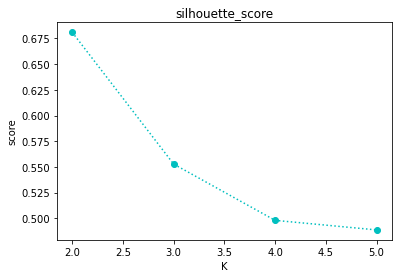

In [70]:
import matplotlib.pyplot as plt
# % jupyter magic show
%matplotlib inline
plt.plot(plotx, ploty, "co:")
plt.title("silhouette_score")
plt.xlabel("K")
plt.ylabel("score")
# plt.show()